In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings 
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('datasets/dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
data.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

# Data Cleaning

In [5]:
df = data.drop(["Unnamed: 0","track_id","artists","album_name","track_name","duration_ms","explicit","time_signature", "popularity"], axis =1)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music
113996,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music
113997,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music
113998,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music


In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      114000 non-null  float64
 1   energy            114000 non-null  float64
 2   key               114000 non-null  int64  
 3   loudness          114000 non-null  float64
 4   mode              114000 non-null  int64  
 5   speechiness       114000 non-null  float64
 6   acousticness      114000 non-null  float64
 7   instrumentalness  114000 non-null  float64
 8   liveness          114000 non-null  float64
 9   valence           114000 non-null  float64
 10  tempo             114000 non-null  float64
 11  track_genre       114000 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 10.4+ MB


In [8]:
df["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

correlation_matrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450
energy,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851
key,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917
loudness,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446
mode,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566
speechiness,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273
acousticness,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224
instrumentalness,-0.185606,-0.181879,-0.006823,-0.433477,-0.049955,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330
liveness,-0.131617,0.184796,-0.001600,0.076899,0.014012,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600
valence,0.477341,0.258934,0.034103,0.279848,0.021953,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273


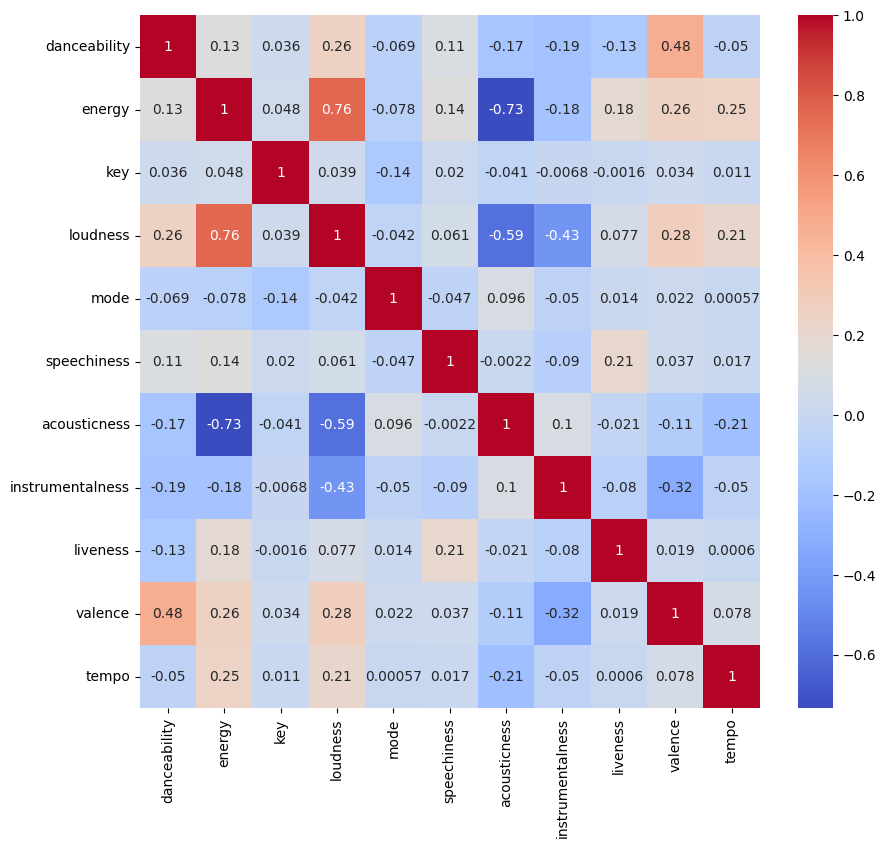

In [10]:
plt.subplots(figsize=(10,9))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

In [11]:
x = df.loc[:, :"tempo"]
y = df["track_genre"]

In [12]:
y.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

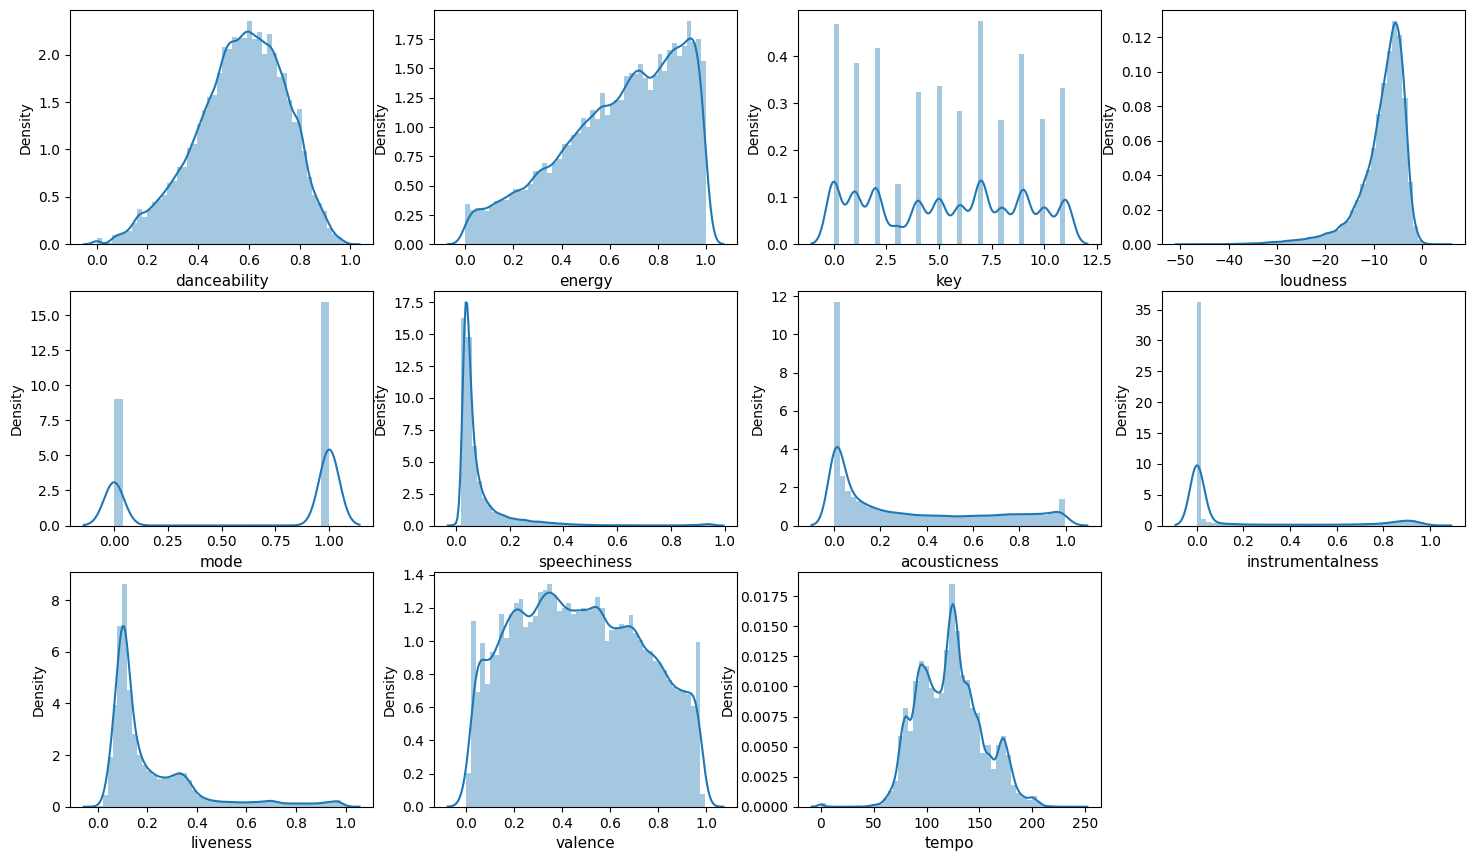

In [13]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

# Model Traning

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.2, random_state=42, shuffle = True)

In [15]:
xtrain.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [16]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000
mean,0.566814,0.640909,5.307906,-8.269080,0.638092,0.084645,0.315485,0.157026,0.213227,0.473899,122.085748
std,0.173281,0.251691,3.559053,5.044375,0.480555,0.105646,0.332679,0.310572,0.190173,0.258995,29.970484
min,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.471000,2.000000,-10.014000,0.000000,0.035900,0.017100,0.000000,0.097900,0.260750,99.053000
50%,0.580000,0.685000,5.000000,-7.013000,1.000000,0.048900,0.169000,0.000041,0.132000,0.464000,122.010000
75%,0.695000,0.854000,8.000000,-4.998750,1.000000,0.084400,0.599000,0.050200,0.273000,0.683000,140.056000
max,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000


## Normalize the Data (MinMaxScaler())

In [17]:
# Normalize the data
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [18]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000
mean,0.575445,0.640909,0.482537,0.763219,0.638092,0.087715,0.316752,0.157026,0.213227,0.476280,0.548441
std,0.175920,0.251691,0.323550,0.093306,0.480555,0.109478,0.334016,0.310572,0.190173,0.260297,0.134635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.462944,0.471000,0.181818,0.730944,0.000000,0.037202,0.017169,0.000000,0.097900,0.262060,0.444972
50%,0.588832,0.685000,0.454545,0.786453,1.000000,0.050674,0.169679,0.000041,0.132000,0.466332,0.548101
75%,0.705584,0.854000,0.727273,0.823710,1.000000,0.087461,0.601406,0.050200,0.273000,0.686432,0.629168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
xtest.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000
mean,0.575376,0.643278,0.483098,0.764155,0.635395,0.087752,0.313864,0.152142,0.214857,0.477131,0.549836
std,0.177245,0.250877,0.323981,0.091904,0.481330,0.109925,0.333225,0.305429,0.191193,0.261634,0.134806
min,0.000000,0.000020,0.000000,0.060670,0.000000,0.000000,0.000000,0.000000,0.013700,0.000000,0.000000
25%,0.463959,0.476000,0.181818,0.731142,0.000000,0.037202,0.016365,0.000000,0.098400,0.257286,0.448779
50%,0.588832,0.684000,0.454545,0.787294,1.000000,0.050777,0.166667,0.000043,0.133000,0.467337,0.548451
75%,0.704569,0.854000,0.727273,0.823276,1.000000,0.087979,0.593624,0.044325,0.277000,0.687437,0.631115
max,0.994924,1.000000,1.000000,0.949374,1.000000,0.996891,1.000000,1.000000,1.000000,0.996985,1.093291


## Label Encoder

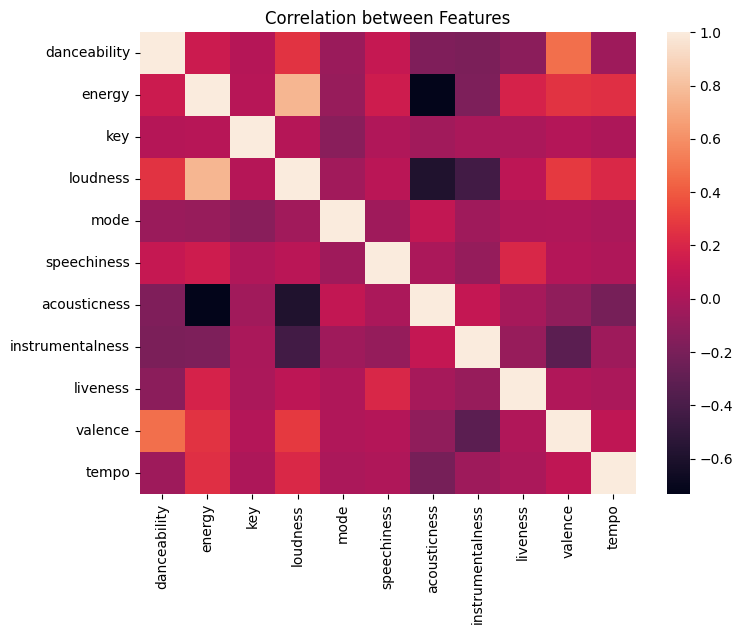

In [20]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)
x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

y_train = le.inverse_transform(ytrain)
y_test = le.inverse_transform(ytest)
y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)
np.unique(y_train)
plt.subplots(figsize=(8,6))
ax = sns.heatmap(xtrain.corr()).set(title = "Correlation between Features")

## PCA

PCA is a popular dimensionality reduction approach that may assist in decreasing the complexity of large datasets and increasing the performance of machine learning models.

With input data x, the algorithm uses PCA to minimize the number of features to two parts that explain the variation. The reduced Dataset is shown on a 2D scatter plot, with dots colored by class labels in y. This aids in visualizing the dividing of some classes in the reduced feature space.

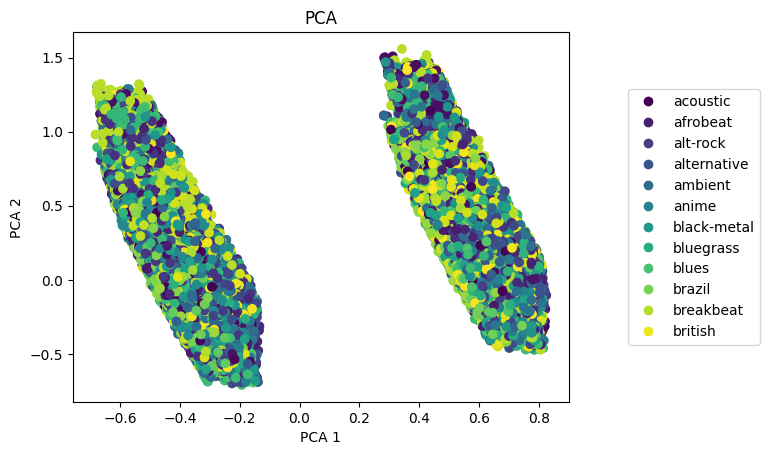

In [21]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

## t-SNE

t-SNE is a popular nonlinear dimensionality reduction approach that may assist in decreasing the complexity of large datasets and improve the performance of machine learning models.

Using t-Distributed Stochastic Neighbor Embedding (t-SNE) on the input data x reduces the number of features in the high-dimensional space to 2D while maintaining similarity between Data points.

A 2D scatter plot shows the reduced Dataset, with dots colored according to their y-class labels. It helps visualize the division of some classes in the reduced feature space.

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

## SVD

SVD is a popular dimensionality reduction approach that may assist in decreasing the complexity of large datasets and increasing the performance of machine learning models.

The following code applies Singular Value Decomposition (SVD) on the input data x with n components=2, reducing the number of input features to two that explain the most variance in the data. The reduced Dataset is then shown on a 2D scatter plot, with the dots colored based on their y-class labels.

This facilitates visualizing the division of multiple classes in the reduced feature space, and the scatter plot is made with the matplotlib tool.

In [ ]:
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x, y)
plot_svd = plt.scatter(x_svd[:,0], x_svd[:,1], c=y)
handles, labels = plot_svd.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("Truncated SVD 1")
plt.ylabel("Truncated SVD 2")
_ = plt.title("Truncated SVD")

## LDA

LDA is a popular dimensionality reduction approach that can increase machine learning model performance by decreasing the influence of irrelevant information.

The following code does Linear Discriminant Analysis (LDA) on the input data x with n components=2, which reduces the number of input features to two linear discriminants that maximize the division between the different classes in the data.

The reduced Dataset is then shown on a 2D scatter plot, with the dots colored based on their y-class labels. This aids in visualizing the division of some classes in the reduced feature space.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x, y.values.ravel())
plot_lda = plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
handles, labels = plot_lda.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
_ = plt.title("Linear Discriminant Analysis")

# Putting Everything Together

In [25]:
# Assuming df is your original DataFrame
x = df.loc[:, :"tempo"]
y = df["track_genre"]
# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the features
scalerx = MinMaxScaler()
xtrain_scaled = scalerx.fit_transform(xtrain)
xtest_scaled = scalerx.transform(xtest)

# Encode the labels
le = preprocessing.LabelEncoder()
ytrain_encoded = le.fit_transform(ytrain)
ytest_encoded = le.transform(ytest)

# Convert to numpy arrays
xtrain_array = xtrain_scaled
ytrain_array = ytrain_encoded
xtest_array = xtest_scaled
ytest_array = ytest_encoded

In [26]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", 
                                               patience=10, 
                                               restore_best_weights=True)

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(xtrain.shape[1],), name="input"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(len(np.unique(ytrain_array)), activation="softmax")
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 114)            │         7,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,682 (272.20 KB)

 Trainable params: 68,914 (269.20 KB)

 Non-trainable params: 768 (3.00 KB)

In [27]:
# Train the model
history = model.fit(xtrain_array, ytrain_array,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0774 - loss: 4.1119 - val_accuracy: 0.1332 - val_loss: 3.6218
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1280 - loss: 3.6616 - val_accuracy: 0.1497 - val_loss: 3.5133
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1393 - loss: 3.5853 - val_accuracy: 0.1555 - val_loss: 3.4584
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1487 - loss: 3.5339 - val_accuracy: 0.1589 - val_loss: 3.4523
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1518 - loss: 3.5021 - val_accuracy: 0.1609 - val_loss: 3.4359
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1585 - loss: 3.4836 - val_accuracy: 0.1672 - val_loss: 3.4006
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1592 - loss: 3.4542 - val_accuracy: 0.1717 - val_loss: 3.3844
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1636 - loss: 3

## Defining a Model

In [28]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(xtest_array, ytest_array)
print(f"Test accuracy: {test_accuracy:.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.1960 - loss: 3.2542
Test accuracy: 0.1964


## Model Evaluation

# Predictions

In [30]:
def predict_genre(features, model, scaler, label_encoder):
    expected_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                        'speechiness', 'acousticness', 'instrumentalness', 
                        'liveness', 'valence', 'tempo']
    features = features[expected_columns]
    
    # Scale the features
    scaled_features = scaler.transform(features)
    # Make prediction
    prediction = model.predict(scaled_features)
    
    # Get the predicted genre and confidence
    predicted_genre_index = np.argmax(prediction)
    confidence = prediction[0][predicted_genre_index]
    
    # Convert the predicted index back to genre name
    predicted_genre = label_encoder.inverse_transform([predicted_genre_index])[0]
    
    return predicted_genre, confidence

input_features = pd.DataFrame({
    'danceability': [0.71],
    'energy': [0.153],
    'key': [9],
    'loudness': [-15.577],
    'mode': [1],
    'speechiness': [0.0385],
    'acousticness': [0.315],
    'instrumentalness': [0.00135],
    'liveness': [0.344],
    'valence': [0.62],
    'tempo': [140.034]  
})

predicted_genre, confidence = predict_genre(input_features, model, scalerx, le)

print(f"Predicted Genre: {predicted_genre}")
print(f"Confidence: {confidence:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Genre: country
Confidence: 13.85%
